# Использование ArcGIS API for Python в Jupyter Notebook

### 1. Простое использование arcgis

- **arcgis.gis** обеспечивает базовую информационную модель для ArcGIS. Этот **модуль** обеспечивает функции управления контентом.
- Класс **GIS** в модуле gis - самый главный в ArcGIS API for Python, это наша входная точка. Он позволяет работать с геоконтентом.

In [1]:
import arcgis
from arcgis.gis import GIS
import configparser

In [2]:
# Считать свой API-key из файла
path = "../token/config.ini"
config = configparser.ConfigParser()
config.read(path)
token = config.get("Settings", "token")

In [3]:
# Подкючиться к ArcGIS с помощью API-key
gis = GIS(api_key=token)

In [4]:
# Для любого объекта можно вызвать справку
gis?

- Чтобы встроить карту нужно вызвать метод `gis.map()`
- **На карте работают базовые элементы: перетаскивание мышью и изменение масштаба**.

In [5]:
# Встроить карту
map1 = gis.map()
map1

MapView(layout=Layout(height='400px', width='100%'))

In [6]:
map2 = gis.map("Palm Springs, CA")
map2

MapView(layout=Layout(height='400px', width='100%'))

In [7]:
moscow = gis.map("Москва")
moscow

MapView(layout=Layout(height='400px', width='100%'))

- Последуюшие манипуляции с объектом `moscow` отразятся на **web-карте** во **фрейме** выше

In [8]:
# Можно управлять зумом карты
moscow.zoom = 13

In [9]:
# Посмотрим список доступных базовых карт
moscow.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [10]:
# Посмотрим все базовые карты во фрейме
from time import sleep
for basemap in moscow.basemaps:
    moscow.basemap = basemap
    sleep(5)

In [11]:
# Установим конкретную базовую карту
moscow.basemap = 'osm'

<Item title:"Moscow_route_rechts" type:Feature Collection owner:OSerebryannaya_i18n>
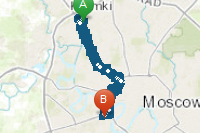

<Item title:"moscow_dtp" type:Feature Collection owner:amaksimov>
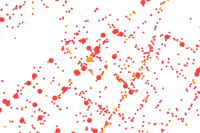

<Item title:"Moscow_route" type:Feature Collection owner:OSerebryannaya_i18n>
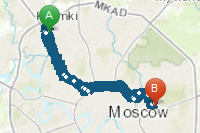

<Item title:"Moscow Folklore Map" type:Feature Collection owner:nivirov>
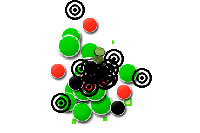

<Item title:"Moscow" type:Feature Collection owner:rokobylas>
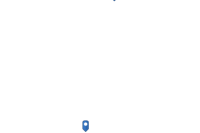

<Item title:"Moscow-Sightseeing" type:Feature Collection owner:FrancoBoni4>
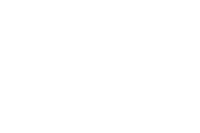

<Item title:"Alphabet of Taste - Moscow" type:Feature Collection owner:richard.trimmer_KumonUK_I>
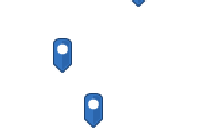

<Item title:"Moscow, ID" type:Feature Collection owner:OOHAWilkinsMedia>
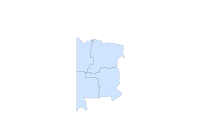

<Item title:"Moscow Walking Tour" type:Feature Collection owner:thomaskoblet>
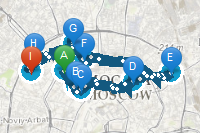

<Item title:"Moscow-Accommodations" type:Feature Collection owner:FrancoBoni4>
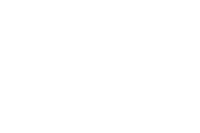

In [12]:
# На карту можно добавлять контент из галереи ArcGIS Online
from IPython.display import display
items = gis.content.search('title:Moscow', item_type='Feature Collection')
for item in items:
    display(item)

<Item title:"Moscow Walking Tour" type:Feature Collection owner:thomaskoblet>
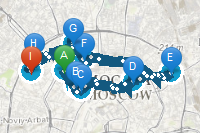

In [13]:
# Moscow Walking Tour - 8-ой элемент
my_layer = items[8]
display(my_layer)

In [14]:
# Добавляем сервис к нашему объекту moscow и смотрим карту
moscow.add_layer(my_layer)

### 2. Работа с объектами

- Поработаем с **набором данных**, используя **pandas** и **arcgis**
- Сначала импортируем csv в pandas, а потом преобразуем его в **слой карты**
- В качестве примера возьмём слой паркоматов Москвы

In [15]:
import pandas as pd
parkomats = pd.read_csv(r'.\data\data-417-2017-02-14.csv', sep=';')

In [16]:
# Посмотрим получившийся объект
parkomats

,ID,NumberOfParkingMeter,global_id,AdmArea,District,StreetName,Location,longitude,latitude,ParkingZoneNumber,geoData,Unnamed: 11
0,71,Паркомат № 2071,1774401,Северный административный округ,район Аэропорт,улица Авиаконструктора Яковлева,"улица Авиаконструктора Яковлева, дом 27, корпус 2",37.519896,55.806302,4014,"{type=Point, coordinates=[37.5198958305129, 55...",NaN
1,72,Паркомат № 2072,1774402,Центральный административный округ,Пресненский район,улица Пресненский Вал,"улица Пресненский Вал, дом 42",37.571246,55.771818,3003,"{type=Point, coordinates=[37.5712460308215, 55...",NaN
2,74,Паркомат № 2074,1774404,Восточный административный округ,район Перово,Электродная улица,"Электродная улица, дом 6Б",37.752553,55.754657,4044,"{type=Point, coordinates=[37.7525532309859, 55...",NaN
3,75,Паркомат № 2075,1774405,Восточный административный округ,район Перово,улица Плеханова,"улица Плеханова, дом 5",37.758299,55.756431,4044,"{type=Point, coordinates=[37.7582990307123, 55...",NaN
4,81,Паркомат № 2081,1774411,Восточный административный округ,район Соколиная Гора,Гаражная улица,"Гаражная улица, дом 4",37.740537,55.758795,4027,"{type=Point, coordinates=[37.7405369309809, 55...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
870,1990,Паркомат № 3287,282752273,Юго-Восточный административный округ,район Люблино,Совхозная улица,"Совхозная улица, дом 45",37.761807,55.675818,4080,"{type=Point, coordinates=[37.7618068305579, 55...",NaN
871,1991,Паркомат № 3397,282752274,Восточный административный округ,район Сокольники,5-я Сокольническая улица,"5-я Сокольническая улица, дом 1",37.688124,55.785373,4025,"{type=Point, coordinates=[37.6881239308419, 55...",NaN
872,1972,Паркомат № 2240,282752301,Западный административный округ,район Фили-Давыдково,улица Герасима Курина,"улица Герасима Курина, дом 16",37.472284,55.731046,4069,"{type=Point, coordinates=[37.4722838315654, 55...",NaN
873,1980,Паркомат № 2345,282752302,Западный административный округ,район Раменки,Университетский проспект,"Университетский проспект, дом 13",37.543410,55.701725,4068,"{type=Point, coordinates=[37.543409630392, 55....",NaN


- Теперь импортируем DataFrame из pandas в объект gis
- Для этого просто вызываем функцию `import_data()`
- В результате у нас получится **объект FeatureCollection**

In [17]:
geoparkomats = gis.content.import_data(parkomats)
geoparkomats

<FeatureCollection>

- Теперь добавим **объекты** на карту
- Для этого инициализируем новый объект map, и в него добавим наш новый **слой**

In [18]:
parkomat_map = gis.map('Москва')
parkomat_map.zoom = 12
parkomat_map.basemap = 'osm'
parkomat_map.add_layer(geoparkomats)
parkomat_map

MapView(layout=Layout(height='400px', width='100%'))

**Теперь попробуем эти данные оформить. Мы можем добавить и стилизовать слой. Например:**

In [19]:
# Разукрасим данные по зонам парковки
parkomat_cat_map = gis.map('Москва')
parkomat_cat_map.zoom = 10
parkomat_cat_map.basemap = 'gray'
parkomat_cat_map.add_layer(geoparkomats, {"renderer":"ClassedColorRenderer", "field_name":"ParkingZoneNumber"})
parkomat_cat_map

MapView(layout=Layout(height='400px', width='100%'))

In [20]:
# Теперь попробуем сделать теплокарту
parkomat_heat_map = gis.map('Москва')
parkomat_heat_map.zoom = 11
parkomat_heat_map.basemap = 'dark-gray'
parkomat_heat_map.add_layer(geoparkomats, {"renderer":"HeatmapRenderer"})
parkomat_heat_map

MapView(layout=Layout(height='400px', width='100%'))